In [1]:
from pyspark.sql import SparkSession

In [2]:
spark = SparkSession.Builder().appName("Analysis").master("local[12]").getOrCreate()

Setting default log level to "WARN".
To adjust logging level use sc.setLogLevel(newLevel). For SparkR, use setLogLevel(newLevel).
23/10/09 11:07:15 WARN NativeCodeLoader: Unable to load native-hadoop library for your platform... using builtin-java classes where applicable


In [3]:
df = spark.read.parquet("../test_data.parquet")
df.show()

+--------------------+--------+------------------+---------------+--------------------+----+------------------+------------+--------------+--------------------+
|                  Id|Notional|     Interest Rate|Reset Frequency|          Start Date|Term|Remaining Notional|Payment Type|Risk Indicator|     Next Reset Date|
+--------------------+--------+------------------+---------------+--------------------+----+------------------+------------+--------------+--------------------+
|533b409c-48ab-422...|  760954|1.8259983840056635|              9|2018-02-28 10:32:...|  25| 611299.7133333334|      Linear|             0|2027-02-26 10:32:...|
|b17b7a4d-8caa-478...|  753427|  2.97732637283376|             30|2016-11-27 10:32:...|  30|          753427.0|      Bullet|             0|2046-11-20 10:32:...|
|cf95d2da-ca85-4ee...|  741393|2.1626017288301536|             20|2008-06-01 10:32:...|  20|          741393.0|      Bullet|             0|2028-05-27 10:32:...|
|90a075b3-48fd-410...|  548286| 5.

In [4]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

import matplotlib as mpl
from pyspark.sql import functions as fn

+---------------+------------------+----------------------+
|Reset Frequency|avg(Interest Rate)|count(Reset Frequency)|
+---------------+------------------+----------------------+
|              5|1.2113898643931529|                 51418|
|              7|1.3080848980219602|                 39671|
|              9|1.6053908631472318|                 50070|
|             10| 1.714365507067422|                102694|
|             15|  2.21269873396586|                201681|
|             20| 2.712873530718124|                301134|
|             25| 3.112015626662064|                211527|
|             30| 3.406965402088654|                 41805|
+---------------+------------------+----------------------+



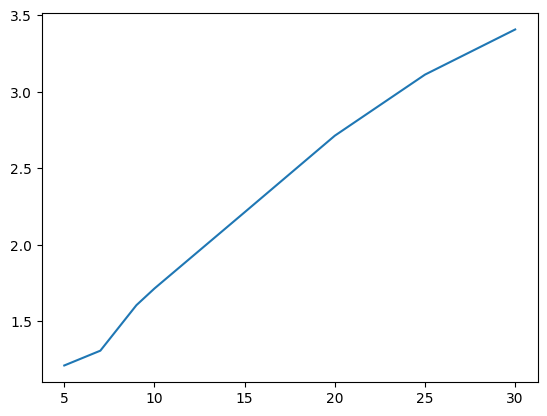

In [5]:
fig, ax = plt.subplots()
rateAvg = df.groupBy('Reset Frequency').agg(fn.mean('Interest Rate'), fn.count('Reset Frequency')).orderBy('Reset Frequency')

types = [x['Reset Frequency'] for x in rateAvg.select('Reset Frequency').collect()]
rates = [x['avg(Interest Rate)'] for x in rateAvg.select("avg(Interest Rate)").collect()]

ax.plot(types, rates)
rateAvg.show()

+--------------+------------------+---------------------+
|Risk Indicator|avg(Interest Rate)|count(Risk Indicator)|
+--------------+------------------+---------------------+
|             0|2.2230623576281165|               800379|
|             1| 2.521607732537192|                99595|
|             2| 3.322802030793216|                50014|
|             3| 4.117730605129373|                30046|
|             4| 5.718652599876351|                19966|
+--------------+------------------+---------------------+



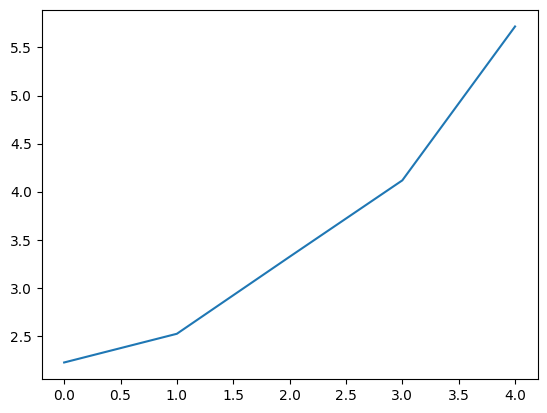

In [6]:
fig, ax = plt.subplots()
riskAvg = df.groupBy('Risk Indicator').agg(fn.mean('Interest Rate'), fn.count('Risk Indicator')).orderBy('Risk Indicator')

types = [x['Risk Indicator'] for x in riskAvg.select('Risk Indicator').collect()]
rates = [x['avg(Interest Rate)'] for x in riskAvg.select("avg(Interest Rate)").collect()]

ax.plot(types, rates)
riskAvg.show()

In [7]:
freq = df.filter(df['Reset Frequency'] == 7).select(["Start Date", "Next Reset Date", "Term"])
freq.show()

+--------------------+--------------------+----+
|          Start Date|     Next Reset Date|Term|
+--------------------+--------------------+----+
|2021-05-11 10:32:...|2028-05-09 10:32:...|  25|
|2019-08-01 10:32:...|2026-07-30 10:32:...|  25|
|2020-03-06 10:32:...|2027-03-05 10:32:...|  20|
|2020-03-25 10:32:...|2027-03-24 10:32:...|  30|
|2018-09-09 10:32:...|2025-09-07 10:32:...|  30|
|2022-08-17 10:32:...|2029-08-15 10:32:...|  20|
|2017-11-05 10:32:...|2024-11-03 10:32:...|  20|
|2021-03-09 10:32:...|2028-03-07 10:32:...|  30|
|2023-03-30 10:32:...|2030-03-28 10:32:...|  30|
|2022-05-26 10:32:...|2029-05-24 10:32:...|  20|
|2020-05-14 10:32:...|2027-05-13 10:32:...|  20|
|2017-09-22 10:32:...|2024-09-20 10:32:...|  20|
|2021-05-17 10:32:...|2028-05-15 10:32:...|  25|
|2018-02-06 10:32:...|2025-02-04 10:32:...|  25|
|2023-07-30 10:32:...|2030-07-28 10:32:...|  25|
|2018-02-21 10:32:...|2025-02-19 10:32:...|  20|
|2016-03-01 10:32:...|2023-02-28 10:32:...|  25|
|2018-07-28 10:32:..

In [8]:
notionalCheck = df.filter(df['Remaining Notional'] <= 0).count()
print(notionalCheck)
if notionalCheck > 0:
        raise Exception("bruh moment")

0


In [9]:
duplicatesCheck = df.dropDuplicates(['Id'])
print(duplicatesCheck.count())
if duplicatesCheck.count() != df.count():
    raise Exception("bruh moment")

1000000


In [10]:
wtf = df.filter(df['Remaining Notional'] <= 0)
wtf.show()

+---+--------+-------------+---------------+----------+----+------------------+------------+--------------+---------------+
| Id|Notional|Interest Rate|Reset Frequency|Start Date|Term|Remaining Notional|Payment Type|Risk Indicator|Next Reset Date|
+---+--------+-------------+---------------+----------+----+------------------+------------+--------------+---------------+
+---+--------+-------------+---------------+----------+----+------------------+------------+--------------+---------------+



In [12]:
spark.stop()